In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
                                            
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing/housing.csv


# Dataset Description:

The house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   

#  Variables in order:


 1. **CRIM**     per capita crime rate by town
 
 1. **ZN**       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 1. **INDUS**    proportion of non-retail business acres per town
 
 1. **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 1. **NOX**      nitric oxides concentration (parts per 10 million)
 
 1. **RM**       average number of rooms per dwelling
 
 1. **AGE**      proportion of owner-occupied units built prior to 1940
 
 1. **DIS**      weighted distances to five Boston employment centres
 
 1. **RAD**      index of accessibility to radial highways
 
 1. **TAX**      full-value property-tax rate per $10,000
 
 1. **PTRATIO**  pupil-teacher ratio by town
 
 1. **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 1. **LSTAT**    % lower status of the population
 
 1. **MEDV**     Median value of owner-occupied homes in $1000's
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the dataset into pandas and get a peek at the underlying data in the dataframe.

In [3]:
name=['CRIM', 'ZN', 'INDUS', 'CHAS' ,'NOX' , 'RM' ,'AGE' ,'DIS', 'RAD','TAX' ,'PTRATIO' ,'B' ,'LSTAT' ,'MEDV' ]
housing = pd.read_csv('/kaggle/input/housing/housing.csv',names=name,delimiter=r"\s+")

In [4]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Dimensions of the dataframe

In [5]:
housing.shape

(506, 14)

In [6]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [8]:
housing.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
201,0.03445,82.5,2.03,0,0.415,6.162,38.4,6.2700,2,348.0,14.7,393.77,7.43,24.1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0
322,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287.0,19.6,396.90,7.70,20.4
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276.0,18.0,357.98,6.65,28.4


In [9]:
from scipy import stats
stats.describe(housing['CRIM'])

DescribeResult(nobs=506, minmax=(0.00632, 88.9762), mean=3.613523557312254, variance=73.98657819906931, skewness=5.207652387859715, kurtosis=36.75278626142281)

# Missing values

In [10]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

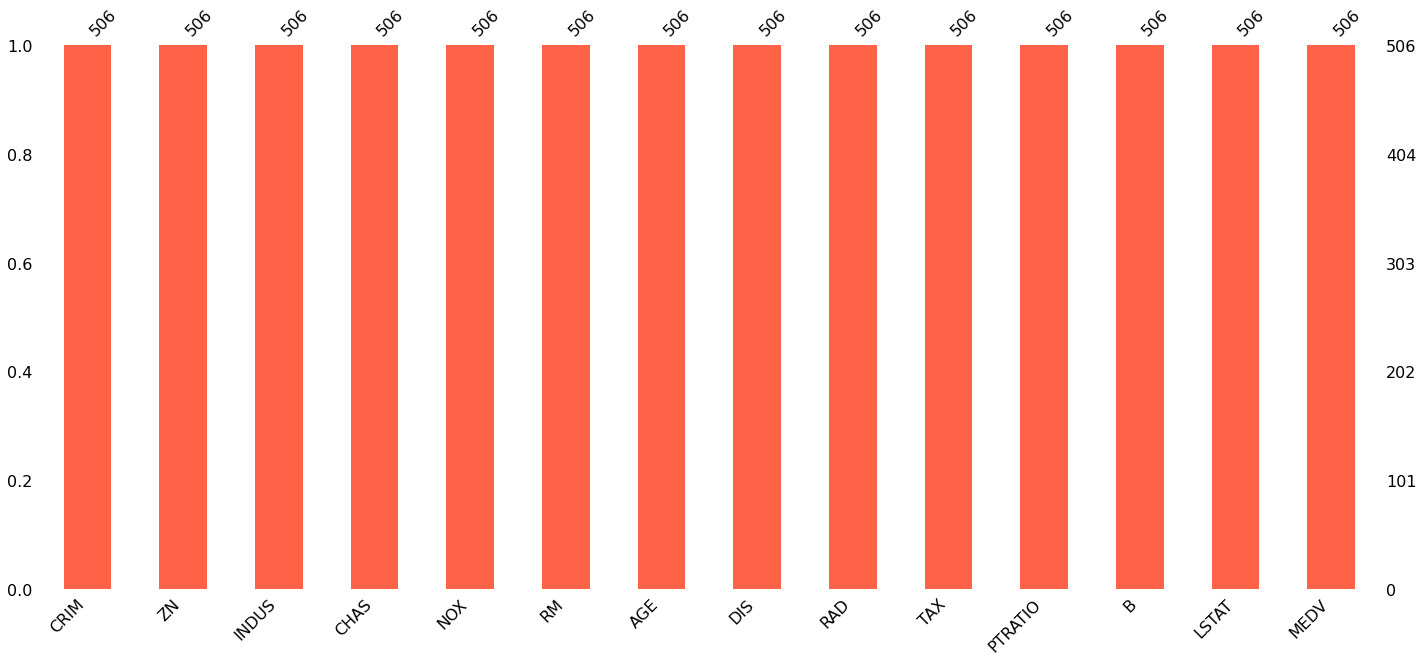

In [11]:
msno.bar(housing,color='tomato')

In [12]:
housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [13]:
housing['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

<AxesSubplot:>

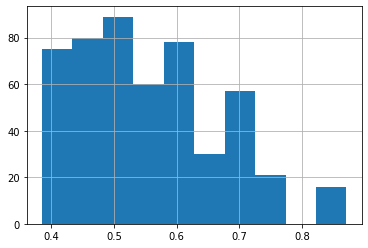

In [14]:
housing['NOX'].hist()

In [15]:
bins = [0,0.40,0.50,0.70,0.80,1]
labels = ['moderate','poor','very_poor','svere','very_severe']
housing['air_quality'] = pd.cut(housing['NOX'], bins=bins, labels=labels)

<AxesSubplot:>

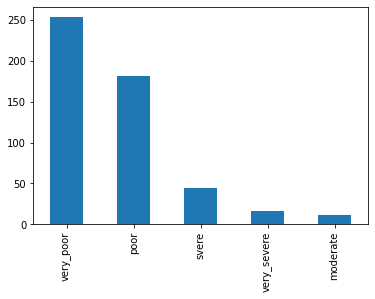

In [16]:
housing['air_quality'].value_counts().plot(kind='bar')

In [17]:
col=['ZN','RAD','air_quality']
housing[col]=housing[col].astype('category')

# Information about the schema

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CRIM         506 non-null    float64 
 1   ZN           506 non-null    category
 2   INDUS        506 non-null    float64 
 3   CHAS         506 non-null    int64   
 4   NOX          506 non-null    float64 
 5   RM           506 non-null    float64 
 6   AGE          506 non-null    float64 
 7   DIS          506 non-null    float64 
 8   RAD          506 non-null    category
 9   TAX          506 non-null    float64 
 10  PTRATIO      506 non-null    float64 
 11  B            506 non-null    float64 
 12  LSTAT        506 non-null    float64 
 13  MEDV         506 non-null    float64 
 14  air_quality  506 non-null    category
dtypes: category(3), float64(11), int64(1)
memory usage: 50.9 KB


# Statistical metrics of each column

In [19]:
housing.describe()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
housing.describe(include='category')

,ZN,RAD,air_quality
count,506.0,506,506
unique,26.0,9,5
top,0.0,24,very_poor
freq,372.0,132,253


In [21]:
housing1 = housing.copy(deep=True)
for var in ('CRIM','INDUS','CHAS','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT','MEDV'):
    zscore = (housing1[var] - housing1[var].mean()) / housing1[var].std()
    housing1[f"zscore_{var}"] = zscore
housing1.sample(5, random_state=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,zscore_INDUS,zscore_CHAS,zscore_RM,zscore_AGE,zscore_DIS,zscore_TAX,zscore_PTRATIO,zscore_B,zscore_LSTAT,zscore_MEDV
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222.0,...,-1.305586,-0.272329,0.803233,0.061285,-0.290801,-1.105022,-0.025651,0.440616,-0.717409,0.616193
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,...,-1.072362,-0.272329,0.585476,-0.432518,0.919907,-0.226877,-0.395176,0.440616,-0.766422,0.148655
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,...,-0.616117,-0.272329,-0.362408,0.601271,0.899629,-1.039754,-0.256604,0.395049,0.860788,-0.645073
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345.0,...,-0.738559,-0.272329,-0.578742,-1.675908,1.283632,-0.375212,0.205301,0.433058,-0.637589,-0.057932
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666.0,...,1.014995,-0.272329,-1.313140,0.981393,-0.803265,1.529413,0.805778,0.264155,-0.344916,-0.188408


In [22]:
housing1.sample(5, random_state=1)
housing1[housing1.zscore_CRIM.abs() > 3].T

,380,398,404,405,410,414,418,427
CRIM,88.9762,38.3518,41.5292,67.9208,51.1358,45.7461,73.5341,37.6619
ZN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INDUS,18.1,18.1,18.1,18.1,18.1,18.1,18.1,18.1
CHAS,0,0,0,0,0,0,0,0
NOX,0.671,0.693,0.693,0.693,0.597,0.693,0.679,0.679
RM,6.968,5.453,5.531,5.683,5.757,4.519,5.957,6.202
AGE,91.9,100.0,85.4,100.0,100.0,100.0,100.0,78.7
DIS,1.4165,1.4896,1.6074,1.4254,1.413,1.6582,1.8026,1.8629
RAD,24,24,24,24,24,24,24,24
TAX,666.0,666.0,666.0,666.0,666.0,666.0,666.0,666.0


In [23]:
print("Outlier CRIM:", (housing1.zscore_CRIM.abs() > 3).sum())
print("Outlier INDUS:", (housing1.zscore_INDUS.abs() > 3).sum())
print("Outlier CHAS:", (housing1.zscore_CHAS.abs() > 3).sum())
print("Outlier RM:", (housing1.zscore_RM.abs() > 3).sum())
print("Outlier AGE:", (housing1.zscore_AGE.abs() > 3).sum())
print("Outlier DIS:", (housing1.zscore_DIS.abs() > 3).sum())
print("Outlier TAX:", (housing1.zscore_TAX.abs() > 3).sum())
print("Outlier PIRATIO:", (housing1.zscore_PTRATIO.abs() > 3).sum())
print("Outlier B :", (housing1.zscore_B.abs() > 3).sum())
print("Outlier LSTAT:", (housing1.zscore_LSTAT.abs() > 3).sum())
print("Outlier MEDV:", (housing1.zscore_MEDV.abs() > 3).sum())

Outlier CRIM: 8
Outlier INDUS: 0
Outlier CHAS: 35
Outlier RM: 8
Outlier AGE: 0
Outlier DIS: 5
Outlier TAX: 0
Outlier PIRATIO: 0
Outlier B : 25
Outlier LSTAT: 5
Outlier MEDV: 0


In [24]:
housing1.shape

(506, 26)

In [25]:
 cond = (
(housing1.zscore_CRIM.abs() > 3) |
(housing1.zscore_INDUS.abs() > 3) |
(housing1.zscore_CHAS.abs() > 4)|
(housing1.zscore_RM.abs() > 3.5) |
(housing1.zscore_AGE.abs() > 3) |
(housing1.zscore_DIS.abs() > 3.5)|
(housing1.zscore_TAX.abs() > 4)|
(housing1.zscore_PTRATIO.abs() > 4) |
(housing1.zscore_B.abs() > 3.5) |
(housing1.zscore_LSTAT.abs() > 4)|
(housing1.zscore_MEDV.abs() > 4))
housing1[cond]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,zscore_INDUS,zscore_CHAS,zscore_RM,zscore_AGE,zscore_DIS,zscore_TAX,zscore_PTRATIO,zscore_B,zscore_LSTAT,zscore_MEDV
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187.0,...,-1.328908,-0.272329,0.631020,-1.153684,3.956602,-1.312691,-0.672319,0.304354,-1.141716,0.822780
364,3.47428,0.0,18.10,1,0.718,8.780,82.9,1.9047,24,666.0,...,1.014995,3.664771,3.551530,0.508905,-0.897722,1.529413,0.805778,-0.023266,-1.031088,-0.068805
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666.0,...,1.014995,-0.272329,-3.876413,0.686532,-1.036155,1.529413,0.805778,-0.021623,-0.774824,0.540082
380,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666.0,...,1.014995,-0.272329,0.972600,0.828634,-1.129568,1.529413,0.805778,0.440616,0.638132,-1.319199
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666.0,...,1.014995,-0.272329,-1.183624,1.116390,-1.094853,1.529413,0.805778,0.440616,2.511803,-1.906340
404,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666.0,...,1.014995,-0.272329,-1.072610,0.597719,-1.038910,1.529413,0.805778,-0.298089,2.062290,-1.525785
405,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666.0,...,1.014995,-0.272329,-0.856276,1.116390,-1.125341,1.529413,0.805778,0.309940,1.446135,-1.906340
410,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666.0,...,1.014995,-0.272329,-0.750956,1.116390,-1.131230,1.529413,0.805778,-3.878357,-0.356118,-0.819041
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,...,1.014995,-0.272329,0.529969,1.116390,-1.076854,1.529413,0.805778,-3.522915,1.199673,-0.579835
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666.0,...,1.014995,-0.272329,-2.357805,1.116390,-1.064317,1.529413,0.805778,-3.591484,3.041136,-0.503724


In [26]:
housing1.drop(housing1[cond].index, inplace = True)

In [27]:
housing1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,zscore_INDUS,zscore_CHAS,zscore_RM,zscore_AGE,zscore_DIS,zscore_TAX,zscore_PTRATIO,zscore_B,zscore_LSTAT,zscore_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,-1.286636,-0.272329,0.413263,-0.119895,0.140075,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,-0.592794,-0.272329,0.194082,0.366803,0.556609,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,-0.592794,-0.272329,1.281446,-0.265549,0.556609,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,-1.305586,-0.272329,1.015298,-0.809088,1.076671,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,-1.305586,-0.272329,1.227362,-0.510674,1.076671,-1.105022,0.112920,0.440616,-1.025487,1.486032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,...,0.115624,-0.272329,0.438881,0.018654,-0.625178,-0.802418,1.175303,0.386834,-0.417734,-0.014440
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,...,0.115624,-0.272329,-0.234316,0.288648,-0.715931,-0.802418,1.175303,0.440616,-0.500355,-0.210154
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,...,0.115624,-0.272329,0.983986,0.796661,-0.772919,-0.802418,1.175303,0.440616,-0.982076,0.148655
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,...,0.115624,-0.272329,0.724955,0.736268,-0.667776,-0.802418,1.175303,0.402826,-0.864446,-0.057932


In [28]:
housing2=housing1.iloc[:,0:15]

In [29]:
housing2.drop('NOX',axis=1, inplace = True)

In [30]:
housing2

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,air_quality
0,0.00632,18.0,2.31,0,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,very_poor
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,poor
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,poor
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,poor
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,very_poor
502,0.04527,0.0,11.93,0,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,very_poor
503,0.06076,0.0,11.93,0,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,very_poor
504,0.10959,0.0,11.93,0,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,very_poor


In [31]:
col=['ZN','RAD','air_quality','CHAS']
housing2[col]=housing2[col].astype('category')

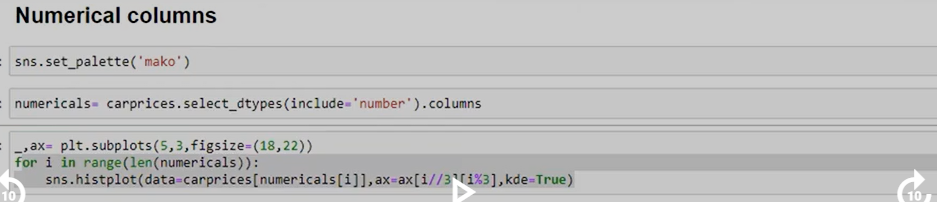

In [32]:
numericals=housing2.select_dtypes(include='number').columns

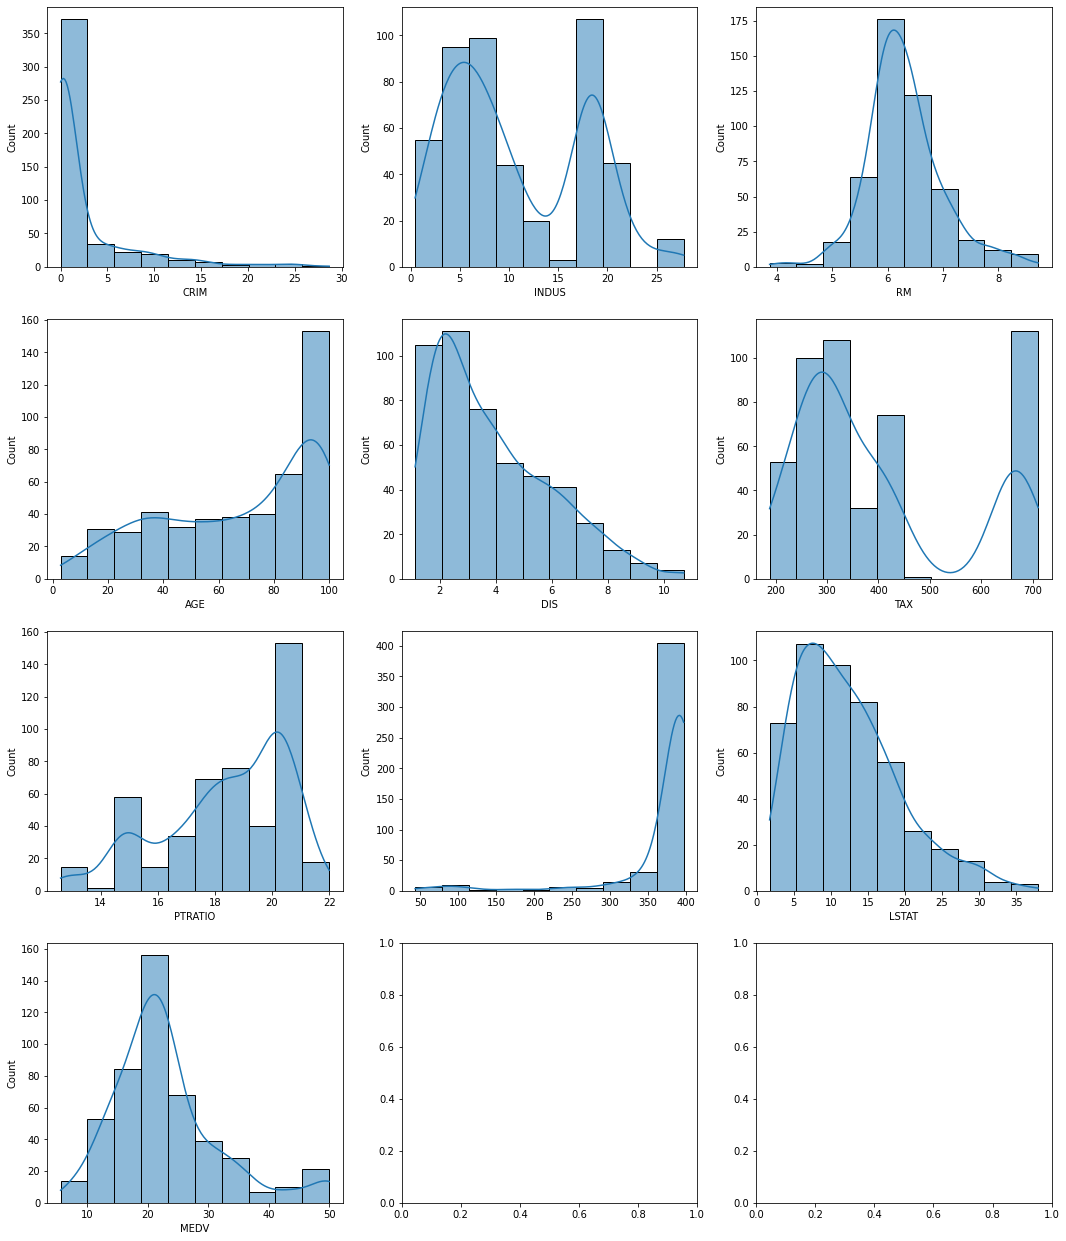

In [33]:
_,ax=plt.subplots(4,3,figsize=(18,22))
for i in range (len(numericals)):
    sns.histplot(data=housing2[numericals[i]],ax=ax[i//3][i%3],kde=True,bins=10)

between -0.5 and 0.5, the data are fairly symmetrical. 
between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. 
less than -1 or greater than 1, the data are highly skewed.

|  symmetry | Value |Faetures |
|--------------|:----:|-------|
| fairly symmetrical | -0.5 & 0.5 |INDUS ,RM |
| moderately skewed | -1.0 & -0.5 or 0.5 & 1 | Age , PTRATIO , TAX ,LSTAT , DIS |
| highly skewed | > -1 0r > 1 | B , MEDV , CRIM |


In [34]:
housing2.skew(numeric_only=True).sort_values()

B         -3.603089
PTRATIO   -0.728841
AGE       -0.540492
INDUS      0.414939
RM         0.504205
TAX        0.832684
DIS        0.898021
LSTAT      0.942113
MEDV       1.182760
CRIM       2.670751
dtype: float64

<AxesSubplot:>

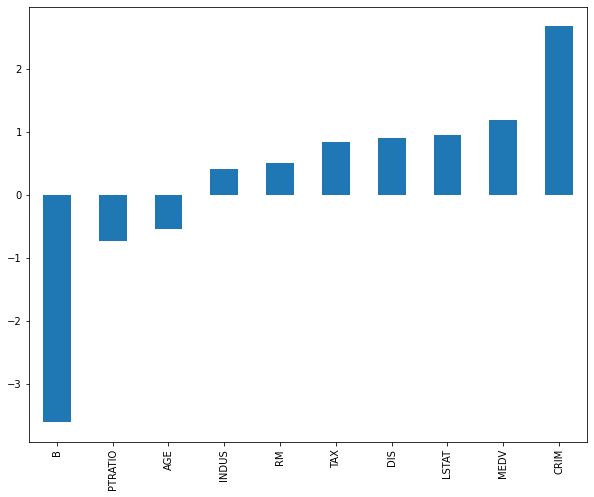

In [35]:
housing2.skew(numeric_only=True).sort_values().plot(kind='bar',figsize=(10,8))

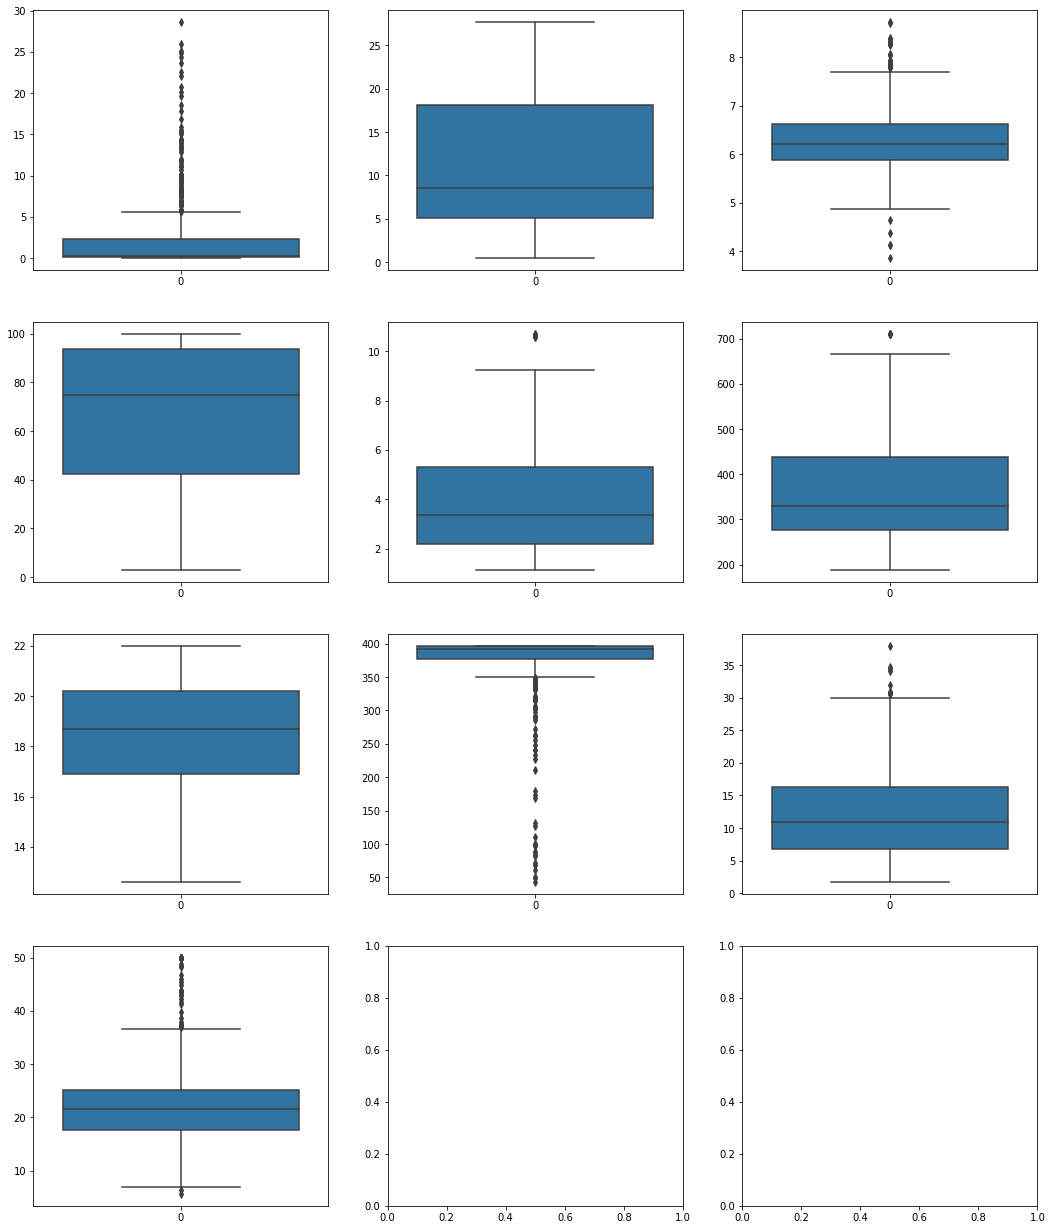

In [36]:
_,ax=plt.subplots(4,3,figsize=(18,22))
for i in range (len(numericals)):
    sns.boxplot(data=housing2[numericals[i]],ax=ax[i//3][i%3])

In [37]:
categorical=housing2.select_dtypes(include='category').columns



# 
# Provide the following information about the dataframe;
# 

# 

# 

# 
# Conduct the following data pre-processing steps only as necessary along with the reason behind doing it with suitable steps;
# 

# 
# Erroneous/wrong values
# 
# Skewed data
# 
# Outliers
# 
# Perform exploratory data analysis and provide key insights derived from the same backed with suitable graphs and plots. Few hints to get you started;
# 
# Distribution of numerical variables
# 
# Distribution of categorical variables
# 
# Numerical vs Categorical plots
# 
# Numerical vs Numerical plots
